# Predicting Molecular Properties using Machine Learning Models on the QM9 Dataset

## Research Question:
- Can we accurately predict quantum chemical properties of molecules using classical machine learning models like Random Forest and XGBoost, and improve perfomance through feature transfer from neural network-based embeddings?

## Project Objectives:
### Develop Predictive Models:
- Use Random Forest and XGBoost algorithms to predict molecular properties from the QM9 dataset.
### Target Key Properties:
Focus on predicting critical quantum molecular properties, including:
- HOMO-LUMO gap
- Dipole moment
- Atomization energy
### Leverage QM9 Dataset:
- Utilize the standardized and widely accepted QM9 dataset for training and evaluation.
### Incorporate Feature Transfer:
- Enhance tabular input with abstract representations inspired by neural networks such as SchNet or PhysNet.
### Bridge ML Paradigms:
- Integrate traditional machine learning with representation learning to improve model performance.
### Evaluate Model Performance:
- Benchmark models using appropriate metrics (e.g., MAE, RMSE) to assess prediction accuracy and generalization.


## Motivation and Significance:
### 1. Reduce Computational Costs:
- Density Functional Theory (DFT) calculations are resource-intensive—machine learning offers a faster alternative.
### 2. Accelerate Material Discovery:
- Predictive ML models can streamline the search for new molecules and materials.
### 3. Enable Scalable Simulations:
- Efficient algorithms allow large-scale quantum simulations previously limited by DFT.
### 4. Enhance Interpretability:
- Combining traditional ML with modern representations supports transparent, explainable models.
### 5. Cross-Disciplinary Impact:
- Potential applications in drug discovery, catalyst development, and electronic materials design.

## Dataset:
We will use the QM9 dataset available through TensorFlow Datasets.
- Dataset link: https://www.tensorflow.org/datasets/catalog/qm9
- The dataset includes over 130,000 small organic molecules with the following features:
- Atom types and 3D coordinates
- Quantum chemical properties (e.g., energy levels, dipole moments)
- Molecular descriptors and calculated DFT outputs
### Examples of Features:
- homo, lumo, gap – frontier orbital energies
- mu – dipole moment
- alpha – polarizability
- U0, H, G – internal energy, enthalpy, and Gibbs free energy
- SMILES and InChI – chemical string representations


In [1]:
import tensorflow_datasets as tfds
import pandas as pd

# Loading the Dataset 
ds, ds_info = tfds.load('qm9',with_info = True, split = "train")

In [2]:
# show the features in our dataset
print(ds_info)

tfds.core.DatasetInfo(
    name='qm9',
    full_name='qm9/original/1.0.0',
    description="""
    QM9 consists of computed geometric, energetic, electronic, and thermodynamic
    properties for 134k stable small organic molecules made up of C, H, O, N, and F.
    As usual, we remove the uncharacterized molecules and provide the remaining
    130,831.
    """,
    config_description="""
    QM9 does not define any splits. So this variant puts the full QM9 dataset in the train split, in the original order (no shuffling).
    """,
    homepage='https://doi.org/10.6084/m9.figshare.c.978904.v5',
    data_dir='C:\\Users\\tkasiror\\tensorflow_datasets\\qm9\\original\\1.0.0',
    file_format=tfrecord,
    download_size=82.62 MiB,
    dataset_size=177.16 MiB,
    features=FeaturesDict({
        'A': float32,
        'B': float32,
        'C': float32,
        'Cv': float32,
        'G': float32,
        'G_atomization': float32,
        'H': float32,
        'H_atomization': float32,
        '

In [3]:
# Convert the entire dataset to a list of dicts
data_list = [dict(example) for example in tfds.as_numpy(ds)]

# Convert list of dicts to DataFrame
df = pd.DataFrame(data_list)

df.head()

,A,B,C,Cv,G,G_atomization,H,H_atomization,InChI,InChI_relaxed,...,gap,homo,index,lumo,mu,num_atoms,positions,r2,tag,zpve
0,157.711807,157.709976,157.706985,6.469,-40.498596,-0.593572,-40.475117,-0.639058,b'InChI=1S/CH4/h1H4',b'InChI=1S/CH4/h1H4',...,0.5048,-0.3877,1,0.1171,0.0000,5,"[[-0.012698136, 1.0858041, 0.008000996], [0.00...",35.364101,b'gdb',0.044749
1,293.609741,293.541107,191.393967,6.316,-56.544960,-0.413283,-56.522083,-0.446845,b'InChI=1S/H3N/h1H3',b'InChI=1S/H3N/h1H3',...,0.3399,-0.2570,2,0.0829,1.6256,4,"[[-0.040426053, 1.0241077, 0.0625638], [0.0172...",26.156300,b'gdb',0.034358
2,799.588135,437.903870,282.945465,6.002,-76.422348,-0.320963,-76.400925,-0.342879,b'InChI=1S/H2O/h1H2',b'InChI=1S/H2O/h1H2',...,0.3615,-0.2928,3,0.0687,1.8511,3,"[[-0.034360494, 0.9775396, 0.007601592], [0.06...",19.000200,b'gdb',0.021375
3,0.000000,35.610035,35.610035,8.574,-77.327431,-0.582941,-77.304581,-0.619937,b'InChI=1S/C2H2/c1-2/h1-2H',b'InChI=1S/C2H2/c1-2/h1-2H',...,0.3351,-0.2845,4,0.0506,0.0000,4,"[[0.5995395, 0.0, 1.0], [-0.5995395, 0.0, 1.0]...",59.524799,b'gdb',0.026841
4,0.000000,44.593884,44.593884,6.278,-93.431244,-0.460105,-93.408424,-0.484601,b'InChI=1S/CHN/c1-2/h1H',b'InChI=1S/CHN/c1-2/h1H',...,0.3796,-0.3604,5,0.0191,2.8937,3,"[[-0.013323931, 1.1324657, 0.008275886], [0.00...",48.747601,b'gdb',0.016601


In [4]:
# a description of the dataset
df.describe()

,A,B,C,Cv,G,G_atomization,H,H_atomization,U,U0,...,U_atomization,alpha,gap,homo,index,lumo,mu,num_atoms,r2,zpve
count,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,...,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000,130831.000000
mean,9.966023,1.406728,1.127399,31.620365,-410.852875,-2.603199,-410.809998,-2.830368,-410.810944,-410.819458,...,-2.814281,75.281189,0.252045,-0.240210,66839.584976,0.011835,2.672953,18.032500,1189.410645,0.149090
std,1830.463013,1.600828,1.107471,4.067581,39.894783,0.349058,39.894066,0.385474,39.894066,39.894283,...,0.382751,8.173831,0.047192,0.021967,38457.235392,0.046850,1.503479,2.943715,280.478149,0.033138
min,0.000000,0.337120,0.331180,6.002000,-714.602112,-3.851932,-714.559204,-4.211903,-714.560181,-714.568054,...,-4.185451,6.310000,0.024600,-0.428600,1.000000,-0.175000,0.000000,3.000000,19.000200,0.015951
25%,2.555040,1.091545,0.911495,28.955000,-437.911835,-2.827818,-437.869919,-3.078822,-437.870865,-437.878799,...,-3.061095,70.480003,0.217000,-0.252600,33749.500000,-0.023300,1.577800,16.000000,1017.431244,0.125638
50%,3.090100,1.370650,1.082030,31.577999,-416.841309,-2.608441,-416.799591,-2.835484,-416.800537,-416.808472,...,-2.819446,75.599998,0.250200,-0.241100,67093.000000,0.012600,2.475300,18.000000,1147.221069,0.148629
75%,3.836890,1.655050,1.282720,34.298000,-387.074524,-2.379072,-387.030273,-2.581601,-387.031219,-387.040466,...,-2.567252,80.610001,0.289400,-0.228900,100063.500000,0.050900,3.596350,20.000000,1309.046997,0.171397
max,619867.687500,437.903870,282.945465,46.969002,-40.498596,-0.320963,-40.475117,-0.342879,-40.476063,-40.478931,...,-0.340990,196.619995,0.622100,-0.101700,133885.000000,0.193500,29.556400,29.000000,3374.753174,0.273944


## Key Columns and Their Meanings (QM9 Dataset)

| **Symbol**    | **Meaning** |
|---------------|-------------|
| `A`        | **Rotational constant A** (GHz) — corresponds to rotation around the **principal axis with the smallest moment of inertia** |
| `B`        | **Rotational constant B** (GHz) — corresponds to rotation around the **intermediate moment of inertia axis** |
| `C`        | **Rotational constant C** (GHz) — corresponds to rotation around the **axis with the largest moment of inertia** |
| `mu`          | **Dipole moment** (Debye) — quantifies charge separation in the molecule |
| `alpha`       | **Isotropic polarizability** (Bohr³) — how easily a molecule's electron cloud distorts in an electric field |
| `homo`        | **Highest Occupied Molecular Orbital energy** (eV) — energy of the most energetic electron in a filled orbital |
| `lumo`        | **Lowest Unoccupied Molecular Orbital energy** (eV) — energy of the lowest empty orbital |
| `gap`         | **HOMO-LUMO energy gap** (eV) — energy difference between `homo` and `lumo`, important for optical/electronic properties |
| `r2`          | **Electronic spatial extent** (Bohr²) — represents the size of the electron cloud |
| `zpve`        | **Zero Point Vibrational Energy** (eV) — energy remaining when vibrational motion is at its lowest quantum state |
| `U0`          | **Internal energy at 0 K** (eV) — includes electronic and vibrational components |
| `U`           | **Internal energy at 298.15 K** (eV) |
| `H`           | **Enthalpy at 298.15 K** (eV) — total energy including pressure-volume work |
| `G`           | **Gibbs free energy at 298.15 K** (eV) — useful for predicting spontaneity of reactions |
| `Cv`          | **Heat capacity at constant volume** (cal/mol·K) — how much heat is needed to raise temperature |
| `SMILES`      | **Simplified Molecular Input Line Entry System** — a compact ASCII string that encodes a molecular structure |
| `InChI`       | **IUPAC International Chemical Identifier** — a textual identifier providing a standard way to encode molecular information |
| `omega1` to `omega3N-6` | **Vibrational frequencies** (cm⁻¹) — frequencies of normal modes of vibration for each molecule |


In [5]:
# check for missing values
df.isna().any().any()

False

### There are no missing values in the dataframe

In [6]:
# check if all the values in given column are of the same dtype
def same_dtype(data_frame):
    for column in data_frame.columns:
        if len(data_frame[column].map(type).unique()) > 1:
            return False
    return True

In [7]:
same_dtype(df)

True

###  All columns contain consistent data types 

In [8]:
# check for duplicates 
# df.duplicated().sum() this code failed due to unhashable values in curtain columns 


def find_hashable_columns(df):
    '''
    returns a list of the hashable columns of a dataframe
    '''
    hashable_cols = []
    for col in df.columns:
        try:
            df[col].apply(hash)
            hashable_cols.append(col)
        except TypeError:
            continue
    return hashable_cols

find_hashable_columns(df)


['A',
 'B',
 'C',
 'Cv',
 'G',
 'G_atomization',
 'H',
 'H_atomization',
 'InChI',
 'InChI_relaxed',
 'SMILES',
 'SMILES_relaxed',
 'U',
 'U0',
 'U0_atomization',
 'U_atomization',
 'alpha',
 'gap',
 'homo',
 'index',
 'lumo',
 'mu',
 'num_atoms',
 'r2',
 'tag',
 'zpve']

In [9]:
df_hashable = df[find_hashable_columns(df)]

In [10]:
df_hashable.duplicated().sum()

0

### No duplicate rows found

In [11]:
del df_hashable 

In [12]:
# Selecting a portion of the DataFrame for visualisations
df_vies = df.iloc[0:200][['SMILES', 'homo', 'lumo', 'mu', 'num_atoms','gap']] 
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap
0,b'C',-0.3877,0.1171,0.0000,5,0.5048
1,b'N',-0.2570,0.0829,1.6256,4,0.3399
2,b'O',-0.2928,0.0687,1.8511,3,0.3615
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796


In [13]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

In [14]:
#Add a new column with the SMILES data written as str not byte
df_vies['SMILES_str'] = df['SMILES'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N


In [15]:
# Compute molecular weight using RDKit
def compute_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol)
    else:
        return float('nan') # in case RDKit fails to parse

df_vies['molecular_weight'] = df_vies['SMILES_str'].apply(compute_mol_weight)
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [16]:
df_vies.molecular_weight.isna().any() #check for missing values

False

In [17]:
df_vies.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [18]:
# Sort by molecular weight
df_vies_sorted = df_vies.sort_values(by='molecular_weight', ascending=True).reset_index(drop=True)
df_vies_sorted.head()

,SMILES,homo,lumo,mu,num_atoms,gap,SMILES_str,molecular_weight
0,b'C',-0.3877,0.1171,0.0000,5,0.5048,C,16.043
1,b'N',-0.2570,0.0829,1.6256,4,0.3399,N,17.031
2,b'O',-0.2928,0.0687,1.8511,3,0.3615,O,18.015
3,b'C#C',-0.2845,0.0506,0.0000,4,0.3351,C#C,26.038
4,b'C#N',-0.3604,0.0191,2.8937,3,0.3796,C#N,27.026


In [19]:
(df_vies_sorted == df_vies).isna().any().any()

False

### Data was already sorted in increasing molecular weight

In [20]:
del df_vies_sorted

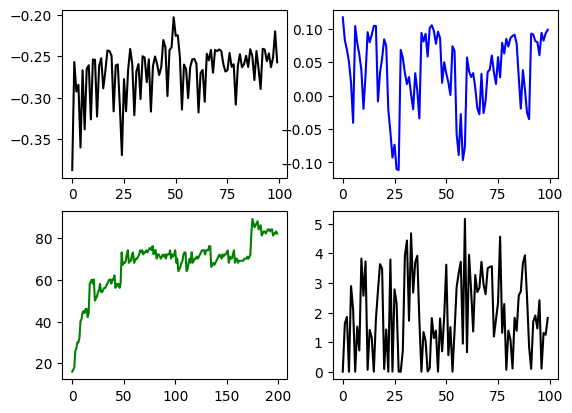

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
axes[0,0].plot(df_vies.homo[:100], color="black");
axes[0,1].plot(df_vies.lumo[:100], color="blue",  linestyle="-");
axes[1,0].plot(df_vies.molecular_weight, color="green");
axes[1,1].plot(df_vies.mu[:100], color="black");

#### Plot (0, 0) – HOMO Energy vs Index

**Observation:**  
- Values are negative (as expected), fairly stable with small fluctuations.

**Insight:**  
- HOMO energy levels are tightly grouped, likely indicating a structurally similar set of molecules in terms of electron-rich orbitals.

#### Plot (0, 1) – LUMO Energy vs Index

**Observation:**  
- More variation than HOMO, possibly a wider range of electron affinity.

**Insight:**  
- Variability in LUMO may indicate greater differences in acceptor properties among the molecules.

#### Plot (1, 0) – Molecular Weight vs Index

**Observation:**  
- Steadily increasing trend, as expected if the data is sorted by molecular weight.

**Insight:**  
- Indicates proper ordering; useful for comparing with other properties.

#### Plot (1, 1) – Dipole Moment (μ) vs Index

**Observation:**  
- Wide fluctuations; no clear pattern.

**Insight:**  
- Dipole moment varies independently, not obviously tied to HOMO or LUMO for these molecules.


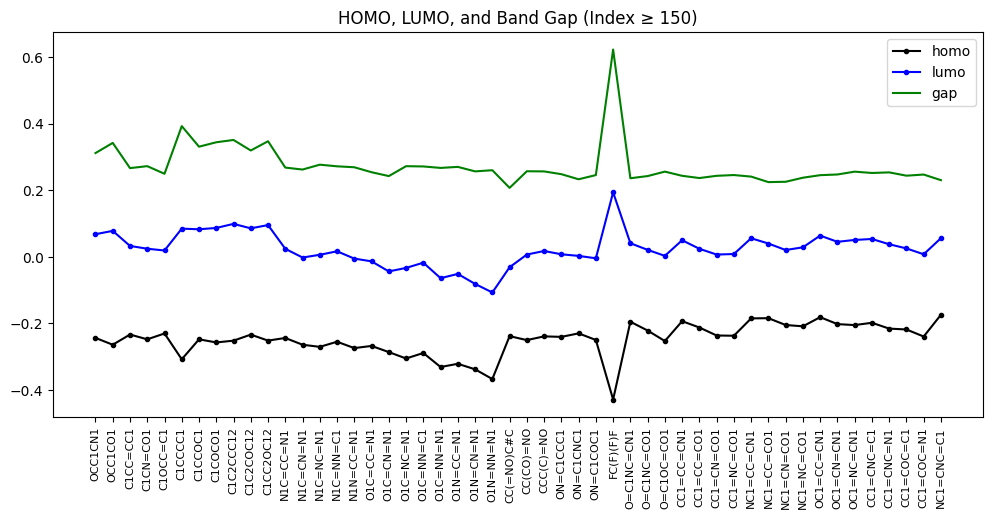

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_vies.homo[150:], color="black", 
        marker = ".", label ="homo");
ax.plot(df_vies.lumo[150:], color="blue",
        marker=".", label="lumo");
ax.plot(df_vies.gap[150:], color="green", label="gap");

ticks = ax.set_xticks(df_vies.index[150:])
labels = ax.set_xticklabels(df_vies.SMILES_str[150:], rotation=90, fontsize=8)
ax.set_title("HOMO, LUMO, and Band Gap (Index ≥ 150)")
ax.legend();

In [23]:
df_vies[['homo', 'lumo', 'gap']].corr()


,homo,lumo,gap
homo,1.000000,0.096983,-0.505721
lumo,0.096983,1.000000,0.809584
gap,-0.505721,0.809584,1.000000


### Insights
- homo and lumo: 0.096983 (weak positive correlation)
- homo and gap: -0.505721 (moderate negative correlation)
- lumo and gap: 0.809584 (strong positive correlation)

In [24]:
import seaborn as sns

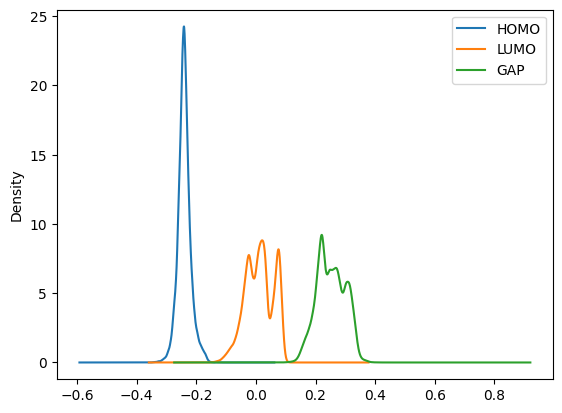

In [25]:
df['homo'].plot.kde();
df['lumo'].plot.kde();
df['gap'].plot.kde();
plt.legend(['HOMO', 'LUMO', 'GAP']);



### Key Insights from HOMO–LUMO Density Plot

1. **HOMO Distribution**
   - Sharp, narrow peak around **–0.22 eV**.
   - Indicates **low variability** in HOMO energy across molecules.
   - Suggests **consistent electronic stability**.

2. **LUMO Distribution**
   - **Broader and multimodal** with peaks near **0 eV**.
   - Indicates **greater diversity** in unoccupied energy levels.
   - Likely reflects presence of **chemically distinct subgroups**.

3. **HOMO–LUMO Gap (Implied)**
   - Average gap appears to be **~0.2–0.4 eV**.
   - Suggests molecules are **electronically soft** (potentially reactive).
   - Useful for **conductive or optoelectronic material screening**.

4. **Chemical Implication**
   - Multimodal LUMO hints at **underlying structural or compositional differences** worth clustering or classifying.


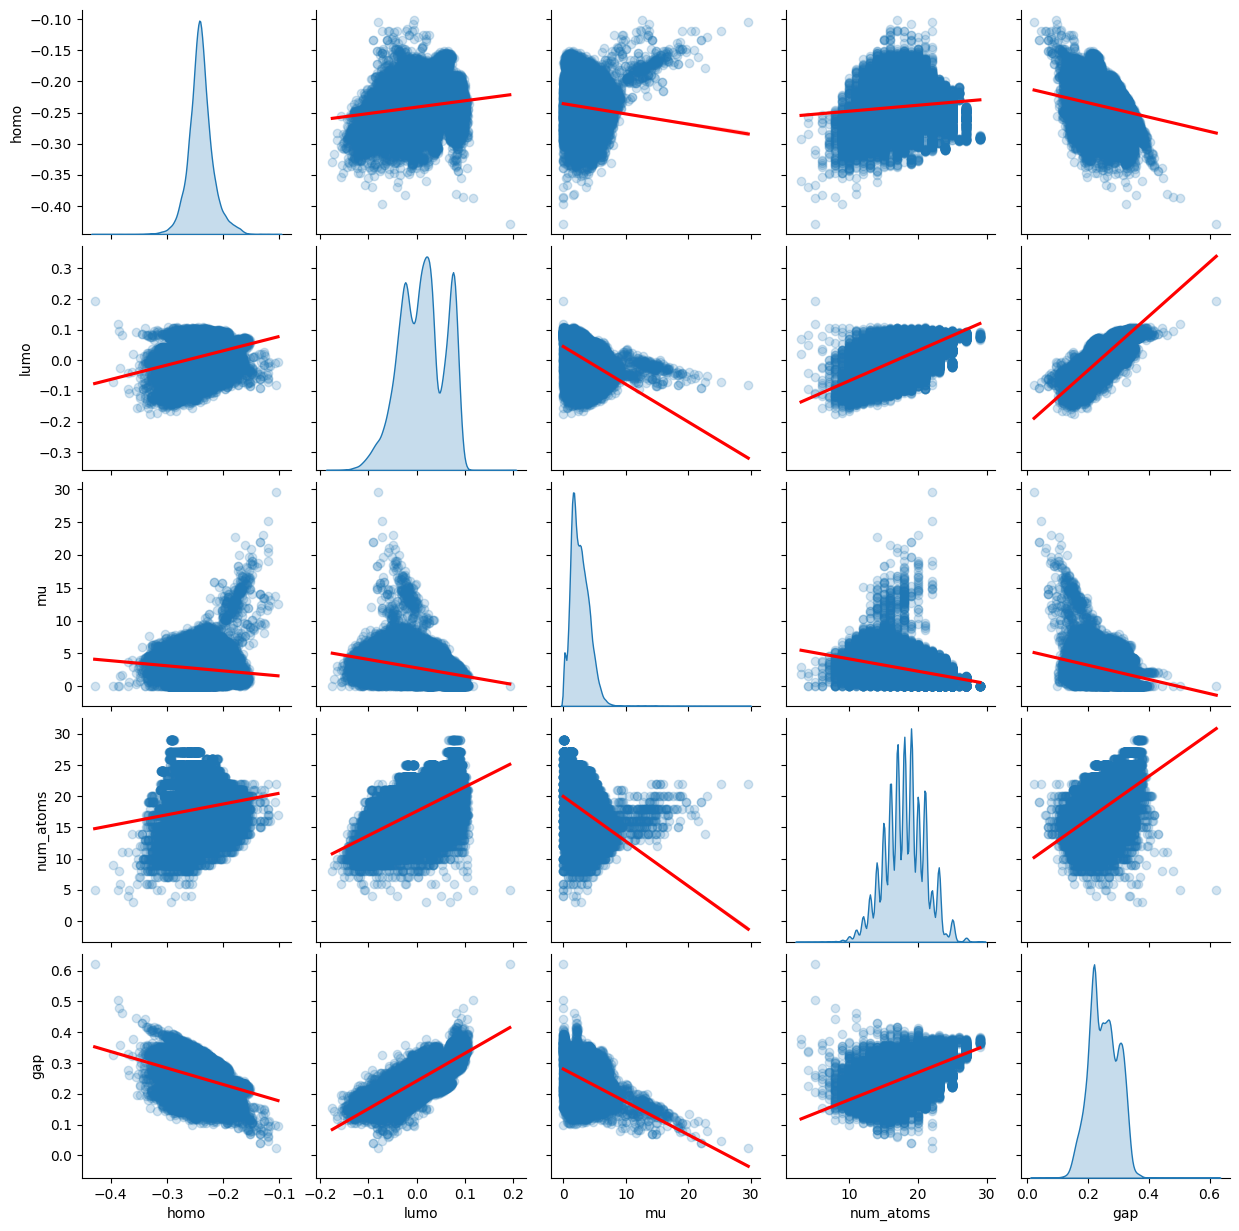

In [30]:
plot = sns.pairplot(
    df[['homo', 'lumo', 'mu', 'num_atoms','gap']], 
    diag_kind="kde",
    kind="reg",
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});

plot.savefig("pairplot_output.png", dpi=300, bbox_inches='tight')